# Specifications

* Model : VGG16
* Split Layer : block3_pool
* Imagenet Class : 235
* Number of Images in test : 88

In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
lossList = np.arange(0.2, 1.2, 0.2)
lossList

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [3]:
pureDir = 'noquantError'
pureList = os.listdir(pureDir)
pureList = np.array([os.path.join(pureDir, i) for i in pureList])
pureList

array(['noquantError\\0Loss_1Packet_block3_pool.npy',
       'noquantError\\0Loss_2Packet_block3_pool.npy',
       'noquantError\\0Loss_3Packet_block3_pool.npy',
       'noquantError\\0Loss_4Packet_block3_pool.npy',
       'noquantError\\0Loss_5Packet_block3_pool.npy',
       'noquantError\\1Loss_1Packet_block3_pool.npy',
       'noquantError\\1Loss_2Packet_block3_pool.npy',
       'noquantError\\1Loss_3Packet_block3_pool.npy',
       'noquantError\\1Loss_4Packet_block3_pool.npy',
       'noquantError\\1Loss_5Packet_block3_pool.npy',
       'noquantError\\2Loss_1Packet_block3_pool.npy',
       'noquantError\\2Loss_2Packet_block3_pool.npy',
       'noquantError\\2Loss_3Packet_block3_pool.npy',
       'noquantError\\2Loss_4Packet_block3_pool.npy',
       'noquantError\\2Loss_5Packet_block3_pool.npy',
       'noquantError\\3Loss_1Packet_block3_pool.npy',
       'noquantError\\3Loss_2Packet_block3_pool.npy',
       'noquantError\\3Loss_3Packet_block3_pool.npy',
       'noquantError\\3Loss_

In [4]:
indices = np.array([0, 1, 2, 3, 4])
pureListAvg = []
for i in indices:
    j=i
    while j <(pureList.shape[0]):
        a = np.load(pureList[j])
        m = np.mean(a, axis=0)
        pureListAvg.append(np.mean(a, axis=0)[1])
        j+=5
pureListAvg

[0.3840909090909091,
 0.6704545454545453,
 0.740909090909091,
 0.7840909090909091,
 0.7840909090909091,
 0.34318181818181814,
 0.6704545454545454,
 0.7386363636363635,
 0.7727272727272727,
 0.7840909090909091,
 0.3477272727272728,
 0.6613636363636364,
 0.7386363636363636,
 0.7613636363636364,
 0.7840909090909091,
 0.3431818181818182,
 0.6431818181818182,
 0.7159090909090909,
 0.7681818181818183,
 0.7840909090909091,
 0.30681818181818177,
 0.6522727272727273,
 0.7272727272727273,
 0.7659090909090909,
 0.7840909090909091]

In [5]:
pureListAvg = np.array(pureListAvg)
plotDataPure = []
for i in indices:
    tempList = []
    j=i
    while j<(pureList.shape[0]):
        tempList.append(pureListAvg[j])
        j+=5
    tempList = np.array(tempList)
    plotDataPure.append(tempList)
print(plotDataPure)

[array([0.38409091, 0.34318182, 0.34772727, 0.34318182, 0.30681818]), array([0.67045455, 0.67045455, 0.66136364, 0.64318182, 0.65227273]), array([0.74090909, 0.73863636, 0.73863636, 0.71590909, 0.72727273]), array([0.78409091, 0.77272727, 0.76136364, 0.76818182, 0.76590909]), array([0.78409091, 0.78409091, 0.78409091, 0.78409091, 0.78409091])]


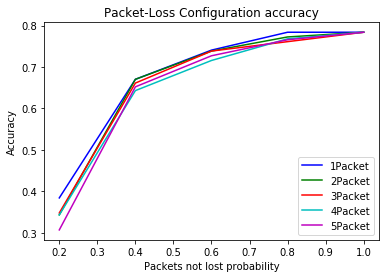

In [6]:
plotDataPure = np.array(plotDataPure)
colours = ['b', 'g', 'r', 'c', 'm']
for i in range(5):
    a = plotDataPure[:, i]
    plt.plot(lossList, a, colours[i],label=f'{i+1}Packet')
plt.xlabel('Packets not lost probability')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Packet-Loss Configuration accuracy')
plt.show()

## Test1: Compare the effect of quantization

In [7]:
quantDir = 'quantizationOnly'
dirList = os.listdir(quantDir)
len(dirList)

100

In [8]:
t = dirList
t = [i.split('_') for i in t]
t.sort(key=lambda x:x[1])
t = ['_'.join(i) for i in t]

In [9]:
t = [os.path.join(quantDir, i) for i in t]
len(t)

100

In [10]:
#0: 10 bit quant
#1: 4 bit quant
#2: 6 bit quant
#3: 8 bit quant
l = 0
quantTest = t[l*25:(l+1)*25]
quantTest

['quantizationOnly\\0Loss_10Quantization_1Packet_block3_pool.npy',
 'quantizationOnly\\0Loss_10Quantization_2Packet_block3_pool.npy',
 'quantizationOnly\\0Loss_10Quantization_3Packet_block3_pool.npy',
 'quantizationOnly\\0Loss_10Quantization_4Packet_block3_pool.npy',
 'quantizationOnly\\0Loss_10Quantization_5Packet_block3_pool.npy',
 'quantizationOnly\\1Loss_10Quantization_1Packet_block3_pool.npy',
 'quantizationOnly\\1Loss_10Quantization_2Packet_block3_pool.npy',
 'quantizationOnly\\1Loss_10Quantization_3Packet_block3_pool.npy',
 'quantizationOnly\\1Loss_10Quantization_4Packet_block3_pool.npy',
 'quantizationOnly\\1Loss_10Quantization_5Packet_block3_pool.npy',
 'quantizationOnly\\2Loss_10Quantization_1Packet_block3_pool.npy',
 'quantizationOnly\\2Loss_10Quantization_2Packet_block3_pool.npy',
 'quantizationOnly\\2Loss_10Quantization_3Packet_block3_pool.npy',
 'quantizationOnly\\2Loss_10Quantization_4Packet_block3_pool.npy',
 'quantizationOnly\\2Loss_10Quantization_5Packet_block3_pool.n

In [11]:
indices = np.array([0, 1, 2, 3, 4])
quantTest = np.array(quantTest)
quantAvg = []
for i in indices:
    j=i
    while j <(quantTest.shape[0]):
        a = np.load(quantTest[j])
        m = np.mean(a, axis=0)
        quantAvg.append(np.mean(a, axis=0)[1])
        j+=5
len(quantAvg)

25

In [12]:
quantAvg = np.array(quantAvg)
plotDataQuant = []
for i in indices:
    tempList = []
    j=i
    while j<(quantTest.shape[0]):
        tempList.append(quantAvg[j])
        j+=5
    tempList = np.array(tempList)
    plotDataQuant.append(tempList)
print(plotDataQuant)

[array([0.41136364, 0.36363636, 0.33863636, 0.33409091, 0.31136364]), array([0.67272727, 0.64772727, 0.64090909, 0.63636364, 0.65      ]), array([0.75      , 0.75      , 0.73409091, 0.72727273, 0.71136364]), array([0.77272727, 0.76590909, 0.77272727, 0.775     , 0.76818182]), array([0.78409091, 0.78409091, 0.78409091, 0.78409091, 0.78409091])]


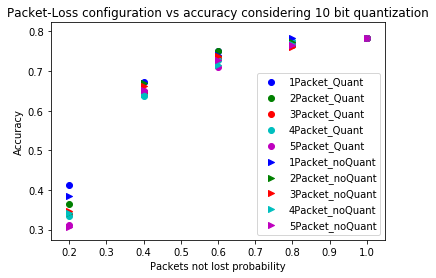

In [13]:
plotDataQuant = np.array(plotDataQuant)
colours = ['b', 'g', 'r', 'c', 'm']
for i in range(5):
    a = plotDataQuant[:, i]
    plt.scatter(lossList, a, c=colours[i], marker='o', label=f'{i+1}Packet_Quant')
    
for i in range(5):
    a = plotDataPure[:, i]
    plt.scatter(lossList, a, c=colours[i],marker='>', label=f'{i+1}Packet_noQuant')
plt.xlabel('Packets not lost probability')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Packet-Loss configuration vs accuracy considering 10 bit quantization')
plt.show()
# I haven't connected the dots using lines as we can't distinguish them

## Effect of bilinear interpolation for error concealment

In [14]:
errorDir  = 'errorConcealOnly'
errorList = os.listdir(errorDir)
errorList = [os.path.join(errorDir, i) for i in errorList]
errorList

['errorConcealOnly\\0Loss_1Packet_block3_pool.npy',
 'errorConcealOnly\\0Loss_2Packet_block3_pool.npy',
 'errorConcealOnly\\0Loss_3Packet_block3_pool.npy',
 'errorConcealOnly\\0Loss_4Packet_block3_pool.npy',
 'errorConcealOnly\\0Loss_5Packet_block3_pool.npy',
 'errorConcealOnly\\1Loss_1Packet_block3_pool.npy',
 'errorConcealOnly\\1Loss_2Packet_block3_pool.npy',
 'errorConcealOnly\\1Loss_3Packet_block3_pool.npy',
 'errorConcealOnly\\1Loss_4Packet_block3_pool.npy',
 'errorConcealOnly\\1Loss_5Packet_block3_pool.npy',
 'errorConcealOnly\\2Loss_1Packet_block3_pool.npy',
 'errorConcealOnly\\2Loss_2Packet_block3_pool.npy',
 'errorConcealOnly\\2Loss_3Packet_block3_pool.npy',
 'errorConcealOnly\\2Loss_4Packet_block3_pool.npy',
 'errorConcealOnly\\2Loss_5Packet_block3_pool.npy',
 'errorConcealOnly\\3Loss_1Packet_block3_pool.npy',
 'errorConcealOnly\\3Loss_2Packet_block3_pool.npy',
 'errorConcealOnly\\3Loss_3Packet_block3_pool.npy',
 'errorConcealOnly\\3Loss_4Packet_block3_pool.npy',
 'errorConce

In [15]:
indices = np.array([0, 1, 2, 3, 4])
errorList = np.array(errorList)
errorAvg = []
for i in indices:
    j=i
    while j <(errorList.shape[0]):
        a = np.load(errorList[j])
        m = np.mean(a, axis=0)
        errorAvg.append(np.mean(a, axis=0)[1])
        j+=5
len(errorAvg)

25

In [16]:
errorAvg = np.array(errorAvg)
plotDataError = []
for i in indices:
    tempList = []
    j=i
    while j<(errorList.shape[0]):
        tempList.append(errorAvg[j])
        j+=5
    tempList = np.array(tempList)
    plotDataError.append(tempList)
print(plotDataError)

[array([0., 0., 0., 0., 0.]), array([0.27727273, 0.31363636, 0.26818182, 0.27045455, 0.275     ]), array([0.71363636, 0.68636364, 0.7       , 0.66136364, 0.70227273]), array([0.77954545, 0.77954545, 0.775     , 0.76136364, 0.775     ]), array([0.78409091, 0.78409091, 0.78409091, 0.78409091, 0.78409091])]


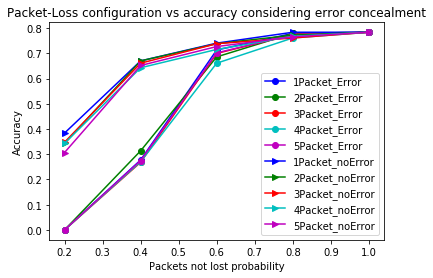

In [17]:
plotDataError = np.array(plotDataError)
colours = ['b', 'g', 'r', 'c', 'm']
for i in range(5):
    a = plotDataError[:, i]
    plt.plot(lossList, a, c=colours[i], marker='o', label=f'{i+1}Packet_Error')
    
for i in range(5):
    a = plotDataPure[:, i]
    plt.plot(lossList, a, c=colours[i],marker='>', label=f'{i+1}Packet_noError')
plt.xlabel('Packets not lost probability')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Packet-Loss configuration vs accuracy considering error concealment')
plt.show()

## Effect of both error concealment and quantization

In [18]:
errorQuantDir = 'quantAndError'
errorQuantList = os.listdir(errorQuantDir)
errorQuantList = [os.path.join(errorQuantDir, i) for i in errorQuantList]
errorQuantList

['quantAndError\\0Loss_10Quantization_errorConceal_1Packet_block3_pool.npy',
 'quantAndError\\0Loss_10Quantization_errorConceal_2Packet_block3_pool.npy',
 'quantAndError\\0Loss_10Quantization_errorConceal_3Packet_block3_pool.npy',
 'quantAndError\\0Loss_10Quantization_errorConceal_4Packet_block3_pool.npy',
 'quantAndError\\0Loss_10Quantization_errorConceal_5Packet_block3_pool.npy',
 'quantAndError\\1Loss_10Quantization_errorConceal_1Packet_block3_pool.npy',
 'quantAndError\\1Loss_10Quantization_errorConceal_2Packet_block3_pool.npy',
 'quantAndError\\1Loss_10Quantization_errorConceal_3Packet_block3_pool.npy',
 'quantAndError\\1Loss_10Quantization_errorConceal_4Packet_block3_pool.npy',
 'quantAndError\\1Loss_10Quantization_errorConceal_5Packet_block3_pool.npy',
 'quantAndError\\2Loss_10Quantization_errorConceal_1Packet_block3_pool.npy',
 'quantAndError\\2Loss_10Quantization_errorConceal_2Packet_block3_pool.npy',
 'quantAndError\\2Loss_10Quantization_errorConceal_3Packet_block3_pool.npy',

In [19]:
indices = np.array([0, 1, 2, 3, 4])
errorQuantList = np.array(errorQuantList)
errorQuantAvg = []
for i in indices:
    j=i
    while j <(errorQuantList.shape[0]):
        a = np.load(errorQuantList[j])
        m = np.mean(a, axis=0)
        errorQuantAvg.append(np.mean(a, axis=0)[1])
        j+=5
errorQuantAvg

[0.0,
 0.0590909090909091,
 0.29772727272727273,
 0.4818181818181818,
 0.7840909090909091,
 0.0,
 0.1386363636363636,
 0.42954545454545456,
 0.4545454545454545,
 0.7840909090909091,
 0.0,
 0.1272727272727273,
 0.41136363636363643,
 0.6181818181818182,
 0.7840909090909091,
 0.0,
 0.12272727272727271,
 0.13863636363636364,
 0.4727272727272728,
 0.7840909090909091,
 0.0,
 0.0,
 0.4295454545454545,
 0.4704545454545454,
 0.7840909090909091]

In [20]:
errorQuantAvg = np.array(errorQuantAvg)
plotDataQuantError = []
for i in indices:
    tempList = []
    j=i
    while j<(errorQuantList.shape[0]):
        tempList.append(errorQuantAvg[j])
        j+=5
    tempList = np.array(tempList)
    plotDataQuantError.append(tempList)
print(plotDataQuantError)

[array([0., 0., 0., 0., 0.]), array([0.05909091, 0.13863636, 0.12727273, 0.12272727, 0.        ]), array([0.29772727, 0.42954545, 0.41136364, 0.13863636, 0.42954545]), array([0.48181818, 0.45454545, 0.61818182, 0.47272727, 0.47045455]), array([0.78409091, 0.78409091, 0.78409091, 0.78409091, 0.78409091])]


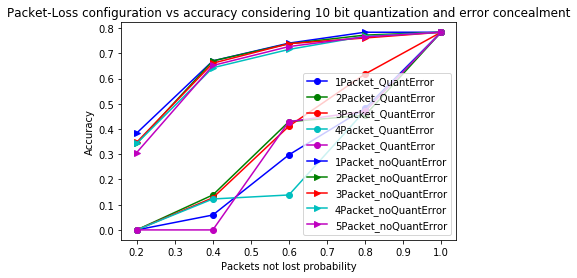

In [21]:
plotDataQuantError = np.array(plotDataQuantError)
colours = ['b', 'g', 'r', 'c', 'm']
for i in range(5):
    a = plotDataQuantError[:, i]
    plt.plot(lossList, a, c=colours[i], marker='o', label=f'{i+1}Packet_QuantError')
    
for i in range(5):
    a = plotDataPure[:, i]
    plt.plot(lossList, a, c=colours[i],marker='>', label=f'{i+1}Packet_noQuantError')
plt.xlabel('Packets not lost probability')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Packet-Loss configuration vs accuracy considering 10 bit quantization and error concealment')
plt.show()